# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member Name -** Suraj Kumar

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Initially i have start with understanding the dataset, then i clean the data to make analysis ready.

Explore the data and understand the behaviour of the same.

Then i have prepare the dataset for creating clusters by various parameters wherein i can remove stop words, white spaces numbers etc. so that i can get important words and based on that i shall form clusters.

Later i have used the silhouette method and k-means elbow method to find optimal number of clusters and built recommender system by cosine similarity and recommended top ten movies.

# **GitHub Link -**
https://github.com/surajsamm/Netflix_Movies_And_TV_Shows_Clustering_-Unsupervised_ML-

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, required to do:**


*   Exploratory Data Analysis.
*   Understanding what type content is available in different countries.

*   Is Netflix has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset from github repository
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter /6:End to End Machine Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  7787
Number of columns are:  12


### Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


<Axes: >

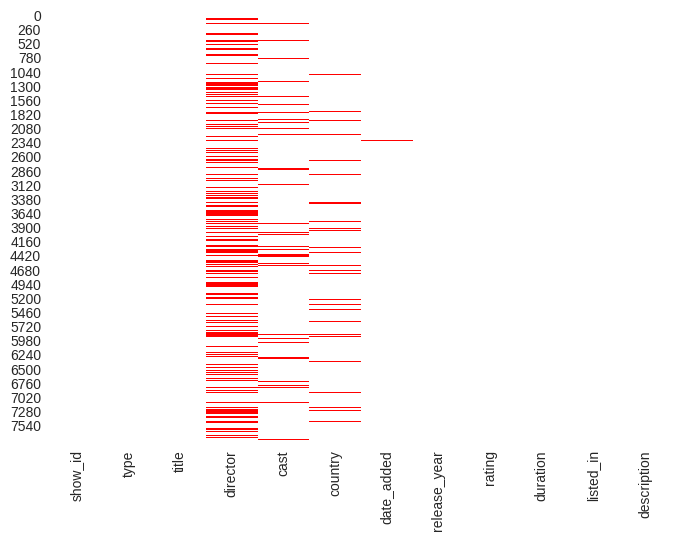

In [ ]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
cmap = sns.color_palette(['white', 'red'])
# Plot the heatmap for null values
sns.heatmap(df.isnull(), cbar=False, cmap=cmap)

### What did you know about your dataset?

* The Netflix dataset consists of tv shows and movies available on Netflix as of 2019.
* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.00,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.93,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.00,NaN,NaN,NaN,NaN


### Variables Description

### <b> The dataset contains movies and tv shows information (show id, type, title, director, release year, rating, duration etc.).</b>


<b>Attribute Information : </b>

- **show_id**: Unique Id number for all the listed rows

- **type**: denotes type of show namely TV Show or Movie

- **title**: title of the movie

- **director**: Name of director/directors

- **cast**: lists the cast of the movie

- **country**: country of the production house

- **date_added**: the date the show was added

- **release_year**: year of the release of the show

- **rating**: show ratings

- **duration**: duration of the show

- **listed_in**: the genre of the show

- **description**: summary/ description of the movie


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Before doing any data wrangling lets create copy of the dataset
data = df.copy()

In [ ]:
# Filling cast null values as not available
data['cast'] = data['cast'].fillna(value='Not available')

In [ ]:
# Filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
data['country'] = data['country'].fillna(value='Not Known')
# data['country'] = data['country'].fillna(value=data['country'].mode())

In [ ]:
# Since date_added and rating have low number of missing values, that are 10 and 7 respectively, i have dropping the same
data = data.dropna(subset=['date_added','rating'])

In [ ]:
# Since director have many null values if we drop them, we loss a lot data so, i replacing them with unknown.
data['director'] = data['director'].fillna(value='Unknown')

In [ ]:
# Checking missing values again for confirmation
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### What all manipulations have you done and insights you found?

To make the data analysis ready i have done the following:
1. Filled missing values of cast with Not available.
2. Filled missing values of country with Not Known.
3. Dropped rows of date_added missing values.
4. Dropped rows of ratings missing values.
5. Dropped the entire column of director as it had much number of missing values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Movies vs TV Shows Share

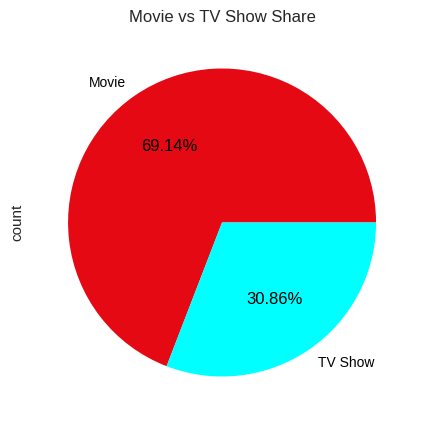

In [ ]:
# Chart - 1 Pie Chart Visualization Code For Movie vs TV Show Share
spread = data['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Create the plot with the specified colors
spread.plot(kind='pie', autopct='%1.2f%%', colors=['#E50914', '#00ffff'], textprops={'color':'black'})

# Set the title
plt.title('Movie vs TV Show Share')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that the types of shows available in netflix is not even with high count for TV shows. 69.14% of the data belongs to movies and 30.86% of the data for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### Chart - 2 : Distribution of Various Ratings

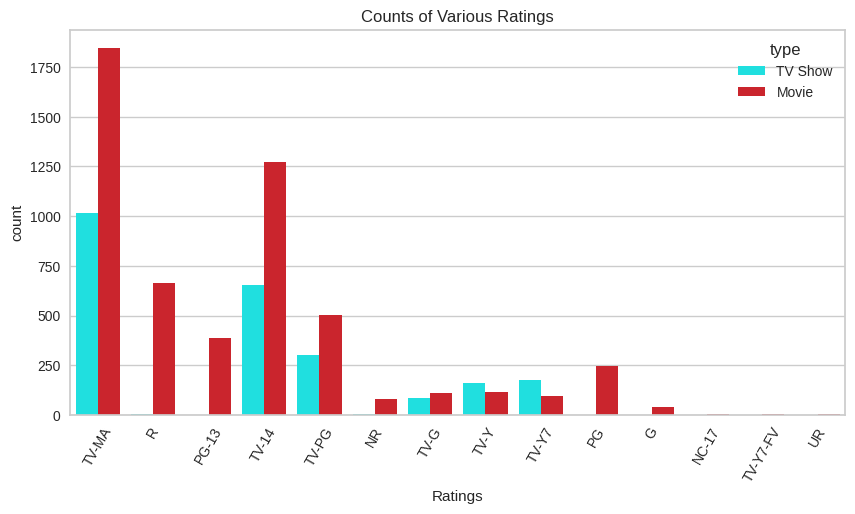

In [ ]:
# Chart - 2 Count Plot Visualization Code for Various Ratings of Shows
plt.figure(figsize=(10, 5))

# Use the preferred colors for the palette
sns.countplot(x='rating', hue='type', data=data, palette=['#00FFFF','#E50914'])

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation=60)

# Display Chart
plt.show()


In [ ]:
# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(data.groupby(['rating', 'type']).size())

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1016
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Movie        95
          TV Show     175
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
dtype: int64


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we can clearly see that the most of the ratings are given by TV-MA followed by TV-14 and the least ratings are given by NC-17.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.***


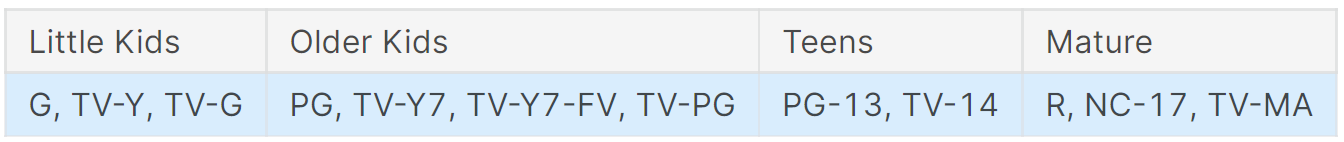



Yes, from above insight we got to know:

* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

#### Chart - 3 : Top 10 Countries with Most Content

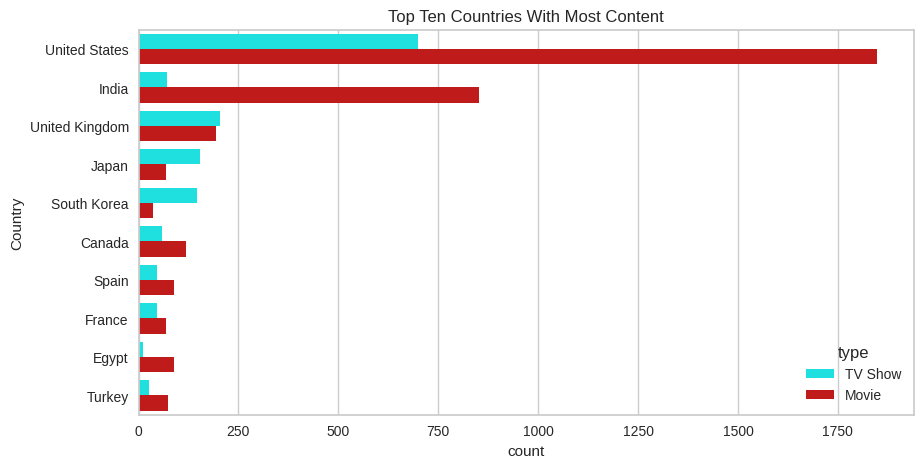

Number of Shows Produced by Top 10 Countries:
type     country       
Movie    United States     1847
         India              852
         United Kingdom     193
         Canada             118
         Egypt               89
         Spain               89
         Turkey              73
         Philippines         70
         Japan               69
         France              69
TV Show  United States      699
         United Kingdom     203
         Japan              155
         South Korea        147
         India               71
         Taiwan              68
         Canada              59
         France              46
         Spain               45
         Australia           44
Name: count, dtype: int64


In [ ]:
# Chart - 3 Count Plot Visualization Code for Content Produced by Different Countries
# Not Taking Unknown Countries
country_df = data[data['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['#00ffff', '#db0000'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')

# Display Chart
plt.show()

# Printing The Counts of Different Shows for Top 10 Countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we found that the content belongs to United States alone is 2546 (Movie: 1847, TV Show: 699) and followed by India is 923 (Movie: 852, TV Show: 71).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:
* The United States is a leading producer of both types of shows (Movies and TV Shows), this makes sense since Netflix is a US company.

* The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

* On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

#### Chart - 4 : Content Released Over The Years

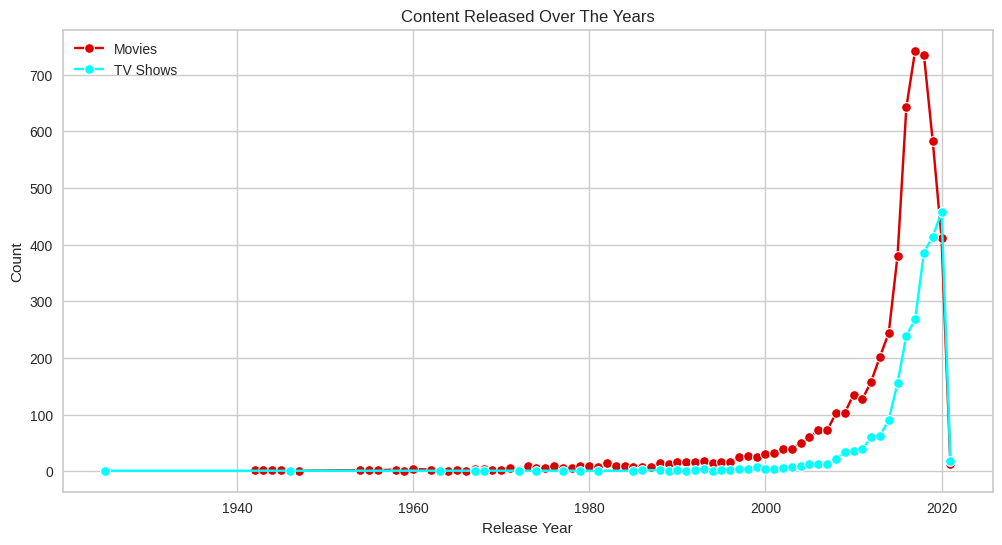

In [ ]:
# Count the number of movies and TV shows released each year
release_counts = data.groupby(['type', 'release_year']).size().reset_index(name='count')

# Separate data for movies and TV shows
movie_year = release_counts[release_counts['type'] == 'Movie']
show_year = release_counts[release_counts['type'] == 'TV Show']

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot for movies
sns.lineplot(data=movie_year, x='release_year', y='count', marker='o', color='#db0000', label='Movies')

# Line plot for TV Shows
sns.lineplot(data=show_year, x='release_year', y='count', marker='o', color='#00ffff', label='TV Shows')

# Set Labels and Title
plt.title('Content Released Over The Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()

# Display Chart
plt.show()


In [ ]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2017            742
         2018            734
         2016            642
         2019            582
         2020            411
         2015            380
         2014            244
         2013            202
         2012            158
         2010            135
TV Show  2020            457
         2019            414
         2018            386
         2017            268
         2016            239
         2015            156
         2014             90
         2013             63
         2012             60
         2011             39
Name: count, dtype: int64


##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different contents are released over the years i have used line plot here.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the content on netflix are of the release date from 2010 to 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Growth in the number of movies on Netflix is much higher than tv shows.
* Most of the content available was released between 2010 and 2020.
* The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
* The line plot shows very few movies, and tv shows got released before the year 2010 and in 2021. It is due to very little data collected from the year 2021.

#### Chart - 5: Top 10 rating given for movie and shows

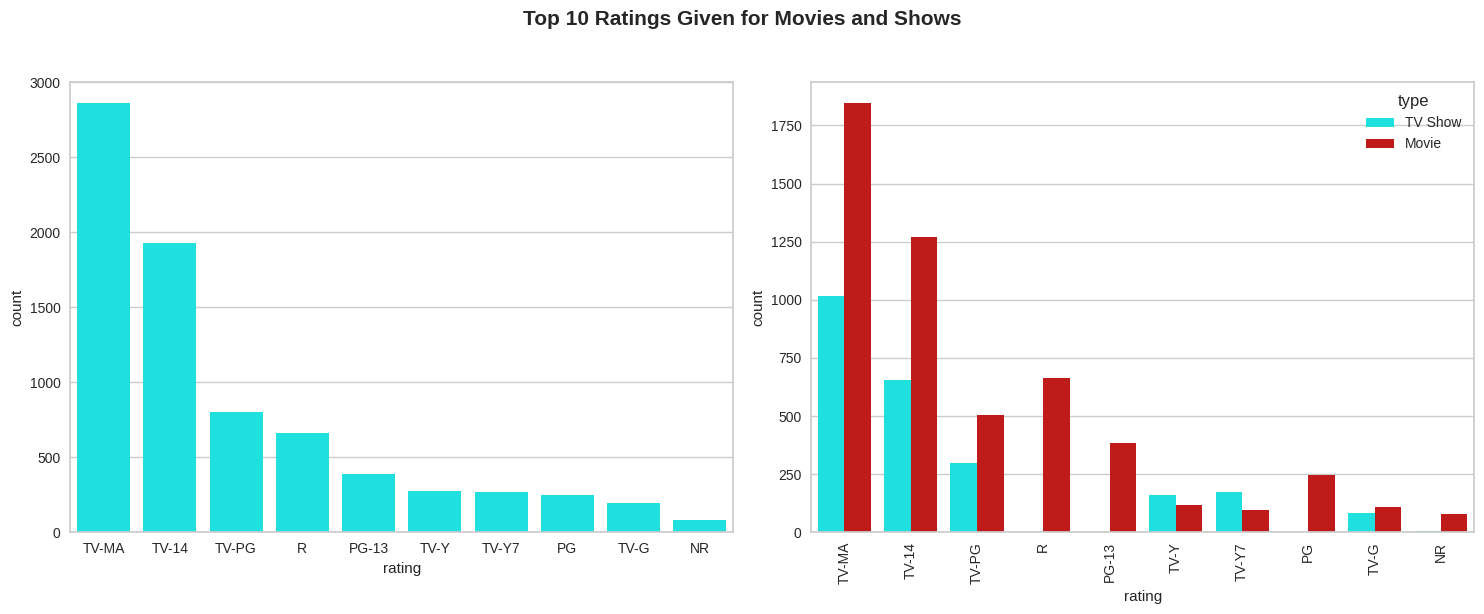

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Top 10 Ratings Given for Movies and Shows', weight='bold', y=1.02, size=15)

# Univariate analysis
sns.countplot(x="rating", data=data, order=data['rating'].value_counts().index[0:10], ax=ax[0], palette=['#00ffff'])

# Bivariate analysis
graph = sns.countplot(x="rating", data=data, hue='type', order=data['rating'].value_counts().index[0:10], ax=ax[1], palette=['#00ffff', '#db0000'])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

Popular Ratings: Identifies the most common ratings for movies and TV shows.

Content Type Trends: Shows how ratings differ between movies and TV shows.

Top Ratings: Highlights the ratings that are most frequently given, indicating viewer preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights from these analyses can drive positive business impacts by:

Tailoring Content: Aligning content with popular ratings, genres, and top actors or directors to boost viewer engagement.

Optimizing Marketing: Targeting marketing campaigns around popular content and trends to attract more viewers.

Improving Strategy: Allocating resources effectively based on content release trends and audience preferences.

Overall, these insights help in creating a more appealing and effective content strategy.

#### Chart - 6 : Duration Distribution for Netflix Movies

In [ ]:
# Splitting Movie and Separating Values
df_movies = data[data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

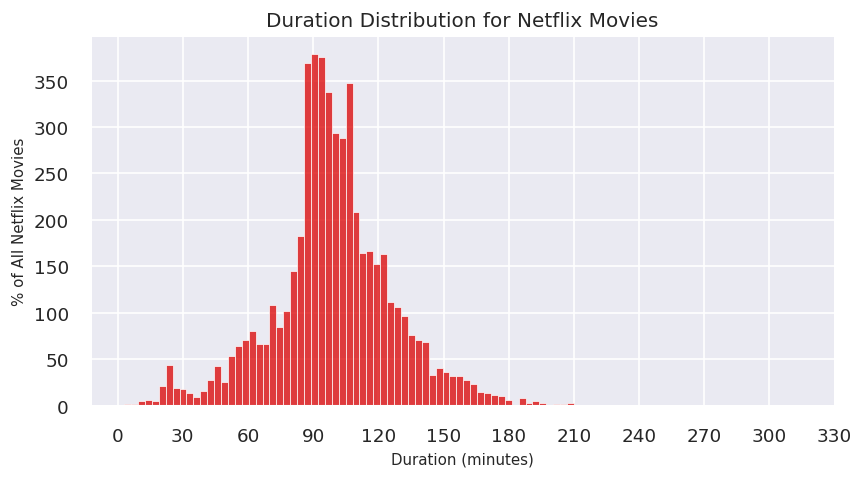

In [ ]:
# Chart - 6 Histogram Visualization Code for Duration Distribution of Netflix Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='#db0000')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the netflix movies.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

*  On netflix most of the movies last for 90 to 120 minutes.
*  So for target audience, movies duration will be greater than minimum 90 minutes.


#### Chart - 7 : Most Used Words in Shows Title

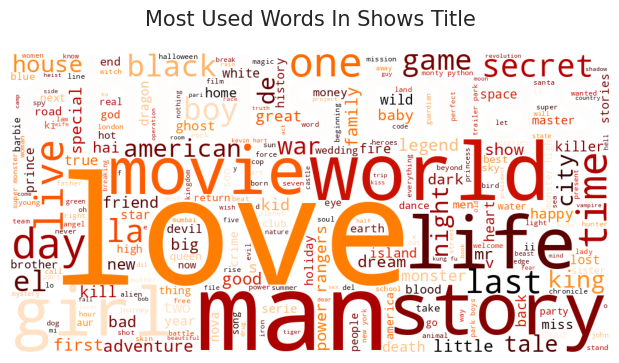

In [ ]:
# Chart - 7 WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in data.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

##### 2. What is/are the insight(s) found from the chart?

From above word cloud plot, it is observed that most repeated words in title include Christmas, Love, World, Man, and Story.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Most repeated words in title include Christmas, Love, World, Man, and Story.
* We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

#### Chart - 8 : Top 10 Genres on Netflix

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = data['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head(10)

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


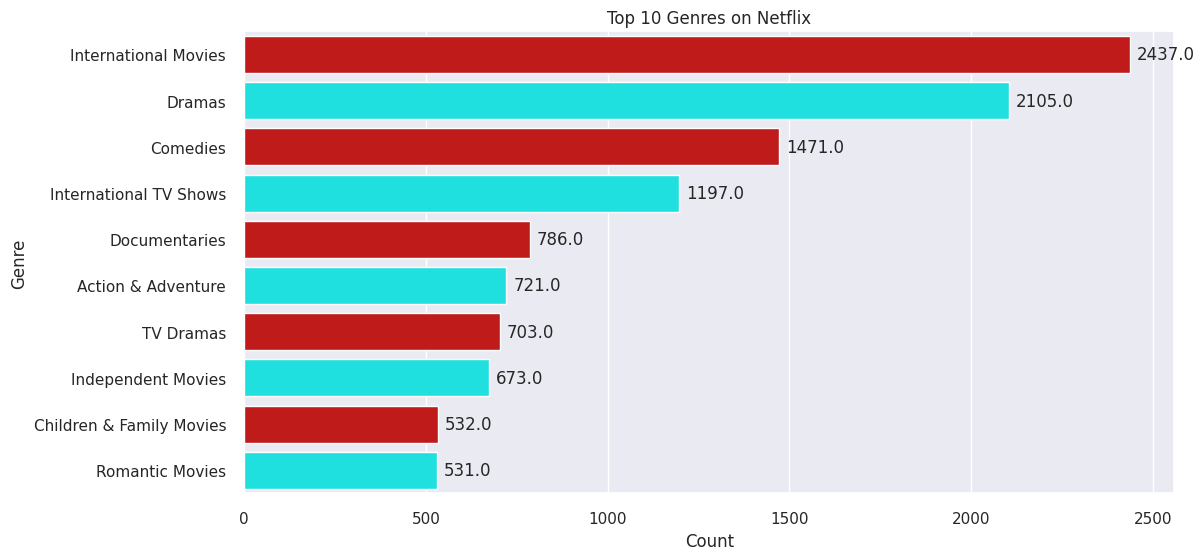

In [ ]:
# Chart - 8 Count Plot Visualization Code for Top 10 Genres on Netflix
# Separating Genres
genres = data['listed_in'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts().reset_index().rename(columns={'index': 'genre', 0: 'count'})

# Select top 10 genres
top_genres = genre_counts.head(10)

# Create Count Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_genres, x='count', y='genre', palette=['#db0000', '#00ffff']*5)  # Apply the specified colors

# Set Labels and Title
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')

# Add annotations on bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Display the Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
* Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

#### Chart - 9 : Top 10 Directors on Netflix

In [ ]:
print(f'number of unique directors : {data.director.nunique()}')
print(f'null values in the column : {data.director.isna().sum()}')

number of unique directors : 4048
null values in the column : 0


In [ ]:
# Count the number of directors for TV Shows
num_tv_shows_directed = data[data['type'] == 'TV Show']['director'].dropna().value_counts().sum()
# Count the number of directors for Movies
num_movies_directed = data[data['type'] == 'Movie']['director'].dropna().value_counts().sum()
# Print results
print(f"Number of TV shows directed by directors: {num_tv_shows_directed}")
print(f"Number of Movies directed by directors: {num_movies_directed}")


Number of TV shows directed by directors: 2398
Number of Movies directed by directors: 5372


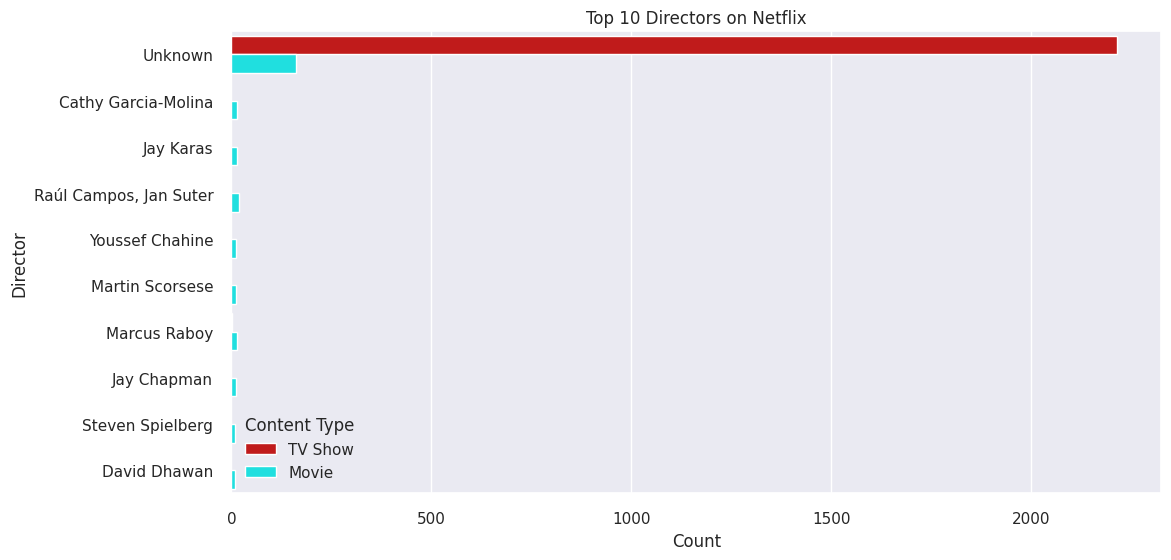

In [ ]:
# Chart - 9 Count Plot Visualization Code for Top 10 Directors on Netflix
top_directors = data['director'].value_counts().head(10).index

# Filter data for top 10 directors
filtered_data = data[data['director'].isin(top_directors)]

# Create count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, y='director', hue='type', palette=['#db0000', '#00ffff'])

# Set Labels and Title
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Count')
plt.ylabel('Director')

# Add legend
plt.legend(title='Content Type')

# Display the Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that the most popular director in netflix is Jan Sutar and followed by Raúl Campos and Marcus Raboy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows are available in netflix.
* As we stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

#### Chart - 10 : Top 10 Actors on Netflix

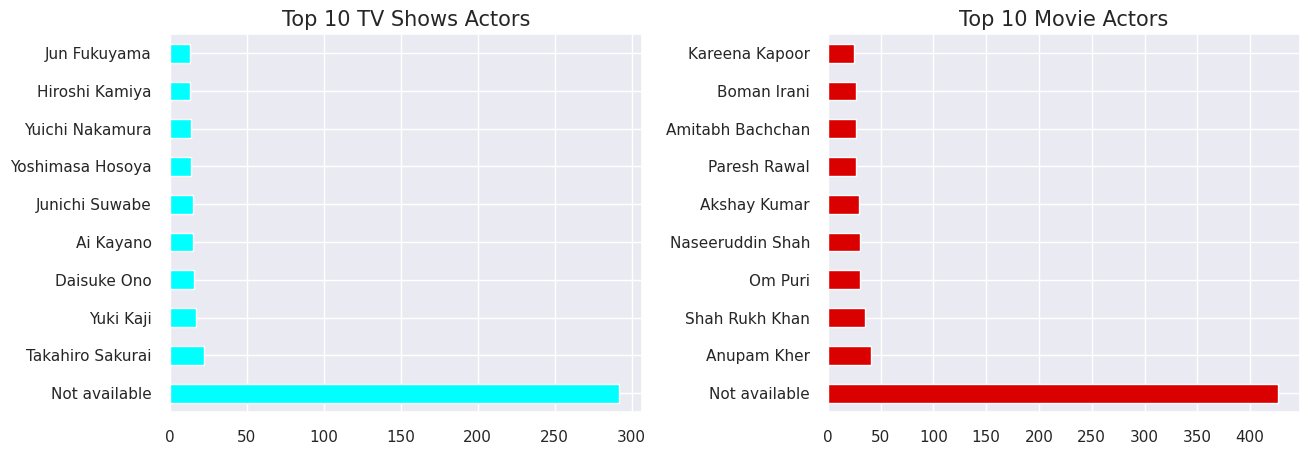

In [ ]:
# Chart - 10 Count Plot Visualization Code for Top 10 Actors on Netflix
data['cast'] = data['cast'].replace('Not Available', pd.NA)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Separating TV shows actors from the cast column
top_TVshows_actor = data[data['type'] == 'TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor = top_TVshows_actor.dropna()  # Drop any NaN values

# Plotting actors who appeared in the highest number of TV shows
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0], color='#00ffff')
a.set_title('Top 10 TV Shows Actors', size=15)

# Separating movie actors from the cast column
top_movie_actor = data[data['type'] == 'Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor = top_movie_actor.dropna()  # Drop any NaN values

# Plotting actors who appeared in the highest number of movies
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1], color='#db0000')
b.set_title('Top 10 Movie Actors', size=15)

# Adjust layout
plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most popular actors with most content in netflix are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and followed by Om Puri and Takahiro Sakurai.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
*  That the actors in the top ten list of most numbers tv shows and movies are from India.
*  Anupam Kher and Shah Rukh Khan have 30 above content alone in netflix.



#### Chart - 11 : Top 10 country with the highest number of movie/shows

In [ ]:
# number of unique values
data['country'].nunique()

682

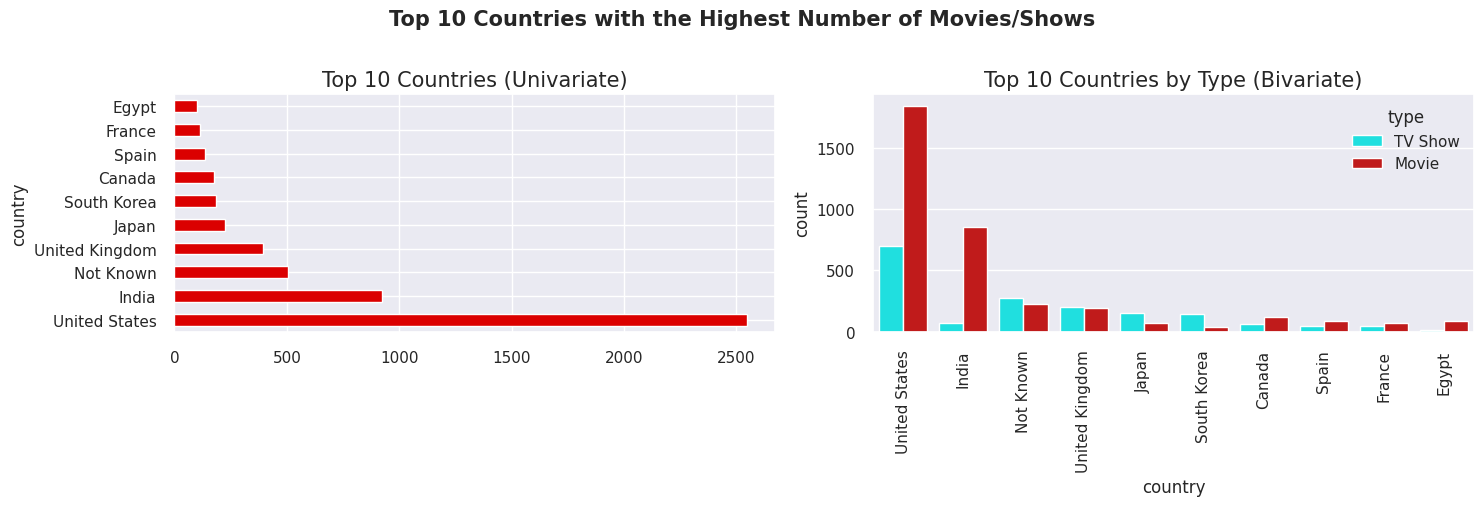

In [ ]:
#Top 10 country with the highest number of movie/shows
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Top 10 Countries with the Highest Number of Movies/Shows', weight='bold', size=15, y=1.01)

# Univariate analysis
data['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0], color='#db0000')
ax[0].set_title('Top 10 Countries (Univariate)', size=15)

# Bivariate analysis
graph = sns.countplot(x="country", data=data, hue='type', order=data['country'].value_counts().index[:10], ax=ax[1], palette=['#00ffff','#db0000'])  # Red and Cyan colors
ax[1].set_title('Top 10 Countries by Type (Bivariate)', size=15)
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart: Shows the top 10 countries with the most movies/shows, using red for clarity and emphasis.

Count Plot: Displays the distribution of movies vs. TV shows in those top 10 countries, using red and cyan to differentiate between content types.

Color Choice: Enhances clarity and visual distinction.

##### 2. What is/are the insight(s) found from the chart?

Top Countries: Identifies the top 10 countries with the highest number of movies and TV shows.

Content Distribution: Shows how movies and TV shows are distributed across these countries, highlighting any differences between them.

#### Chart - 12 : Pair Plot

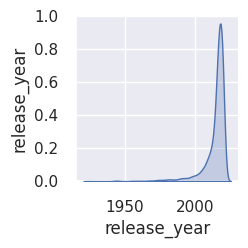

In [ ]:
# Pair Plot Visualization Code
sns.pairplot(data, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of integer type, we are unable to visualize the pair plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments i have noticed that some variable of our netflix dataset does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.

1.   Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in **India**.
2.   The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

### Hypothetical Statement - 1

Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in **India**.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null hypothesis: $H_o : μ_{united states} = μ_{india}$

Alternate hypothesis: $H_1 : μ_{united states} \neq μ_{india}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df_movies[df_movies.country == 'United States']
india_movie_df = df_movies[df_movies.country == 'India']

In [ ]:
# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")

Since p-value (0.007901561023488638) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2
The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: $H_o : μ_{movie} = μ_{tv show}$

Alternate hypothesis: $H_1 : μ_{movie} \neq μ_{tv show}$

Test Type: Two sample z-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
n_movies = data[data['type'] == 'Movie'].count()['type']
n_tv_shows = data[data['type'] == 'TV Show'].count()['type']

In [ ]:
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(data), len(data)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")

Z-statistic: 47.71395895355864
P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Its already handled in data wrangling, so now there are no missing values to handle in the given dataset.

### 2. Handling Outliers
(Most of the columns are categorical, so no outliers observed)

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding
(No need as the data is categorical)

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
data['tags'] = data['description'] + ' ' + data['rating'] + ' ' + data['country'] + ' ' + data['listed_in'] + ' ' + data['cast']

In [ ]:
# Cross checking our result for the function created
print(data['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(to_lower)

# Cross checking our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
data['tags'] = data['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(data['tags'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [ ]:
# Remove White spaces in 'tags' column
data['tags'] = data['tags'].str.strip()

# Cross-check our result for the function created
print(data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text
(Not required)

In [ ]:
# Rephrase Text
# Rephrasing can be achived by the following code

# def rephrase_tags(x):
#     return x.replace('interesting', 'fascinating')
# data['tags'] = data['tags'].apply(rephrase_tags)

#### 7. Tokenization

In [ ]:
# Tokenization
# Loading Libraries
import nltk
nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = data['tags']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'tvma', 'brazil', 'international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi']


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(stemming)

# Cross-check our result for the function created
print(data['tags'][0])

futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi


##### Which text normalization technique have you used and why?

Here i use Stemming.

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP). Stemming is important in natural language processing(NLP). Nil means the suffix is replaced with nothing and is just removed. There may be cases where these rules vary depending on the words. As in the case of the suffix 'ed' if the words are 'cared' and 'bumped' they will be stemmed as 'care' and 'bump'.

SnowballStemmer:

Snowball is a small string processing language for creating stemming algorithms for use in Information Retrieval, plus a collection of stemming algorithms implemented using it. It was originally designed and built by Martin Porter. SnowballStemmer() is a module in NLTK that implements the Snowball stemming technique.

#### 9. Part of speech tagging

In [ ]:
# POS Tagging
# Loading Libraries
import nltk
nltk.download('averaged_perceptron_tagger')

# Apply the pos tagging to the 'tags' column of the DataFrame
data['tags'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
print(data['tags'][0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('future', 'JJ'), ('elite', 'JJ'), ('inhabit', 'NN'), ('island', 'NN'), ('paradise', 'NN'), ('far', 'RB'), ('crowded', 'VBD'), ('slums', 'NNS'), ('get', 'VBP'), ('one', 'CD'), ('chance', 'NN'), ('join', 'NN'), ('saved', 'VBD'), ('squalor', 'JJ'), ('tvma', 'NN'), ('brazil', 'VBD'), ('international', 'JJ'), ('tv', 'NN'), ('shows', 'NNS'), ('tv', 'NN'), ('dramas', 'VBP'), ('tv', 'NN'), ('scifi', 'NN'), ('fantasy', 'NN'), ('joão', 'NN'), ('miguel', 'NN'), ('bianca', 'NN'), ('comparato', 'NN'), ('michel', 'NN'), ('gomes', 'NNS'), ('rodolfo', 'VBP'), ('valente', 'JJ'), ('vaneza', 'FW'), ('oliveira', 'NN'), ('rafael', 'NN'), ('lozano', 'NN'), ('viviane', 'NN'), ('porto', 'NN'), ('mel', 'NN'), ('fronckowiak', 'NN'), ('sergio', 'NN'), ('mamberti', 'NN'), ('zezé', 'NN'), ('motta', 'NN'), ('celso', 'NN'), ('frateschi', 'NN')]


In [ ]:
# Using this tagset we know that which tag shows which type of POS
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [ ]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
data['tags']=data['tags'].apply(sentence)

# Cross-check our result for the function created
print(data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi 


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(data['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# Convert vector into array form for clustering
vector = tfidf.transform(data['tags']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aaron' ... 'özge' 'ünlüoğlu' 'şahin']


In [ ]:
vec_data=pd.DataFrame(vector)
vec_data

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.151457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7768,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

I have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. I can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 5. Feature Manipulation & Selection
(Not required)

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Data Transformation
(No need to transform this data because this data is in form of Text Vectorization)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 7. Data Scaling (NA)
(Here the units of whole data are same so no need to do scaling)

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 8. Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [ ]:
# Dimensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

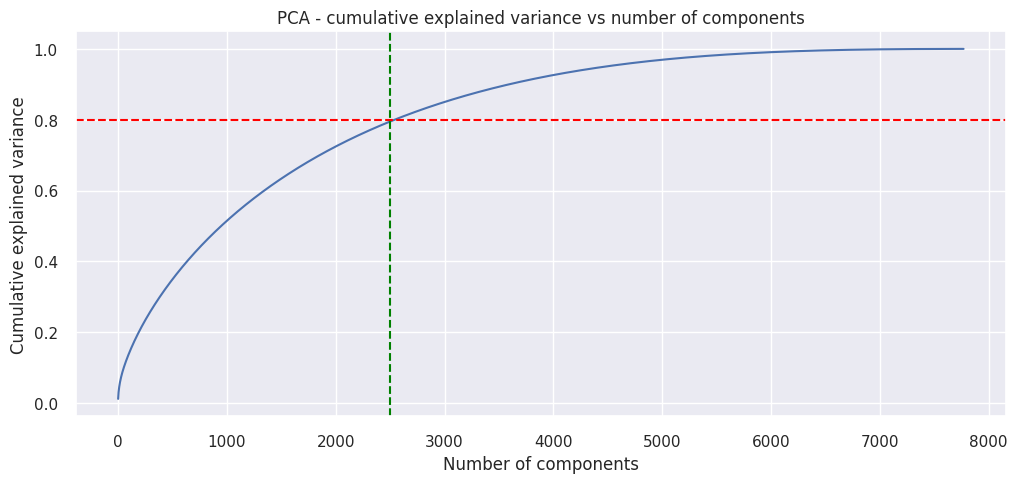

In [ ]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [ ]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [ ]:
# Transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

### 9. Data Splitting (NA)
(Not required)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 10. Handling Imbalanced Dataset (NA)
(Not required)

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 : K-Means Clustering (For Metric Distortion)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

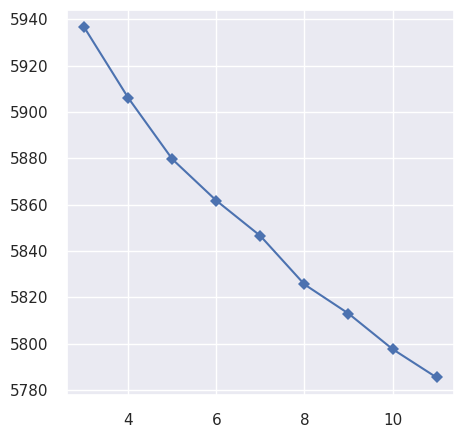

In [ ]:
# ML Model - 1 Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

From this plot, we can say that the best k value is 6. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [ ]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [ ]:
# Adding a new column 'K_mean_cluster' in the dataset
data["K_mean_cluster"]=y_kmean
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags,K_mean_cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devastating earthquake hits mexico city trappe...,5
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",army recruit found dead fellow soldiers forced...,5
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robots hide fear...,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,brilliant group students become cardcounting e...,3


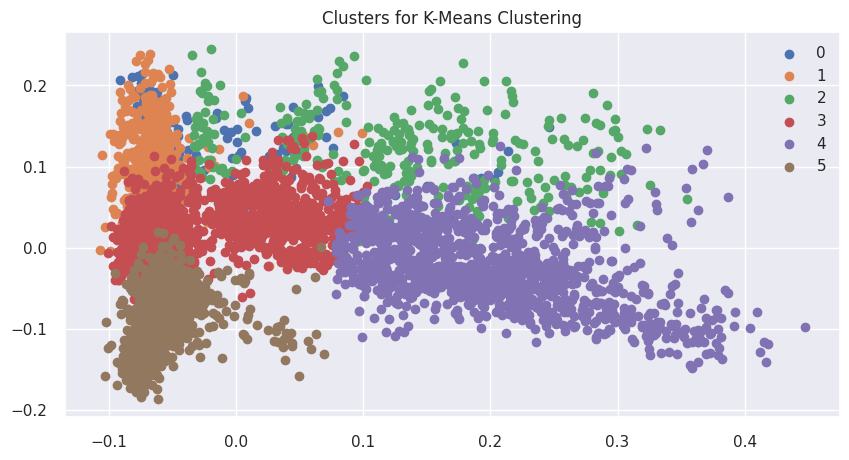

In [ ]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart

Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.


K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

   You could pick K random data points and make those your starting points.

   Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

   Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

  The algorithm is said to have “converged” once there are no more changes.



These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules

##### Which hyperparameter optimization technique have you used and why?

Here i have use Elbow Method for optimal number of k.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square).   i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 : Hierarchical Clustering (Agglomerative Clustering)

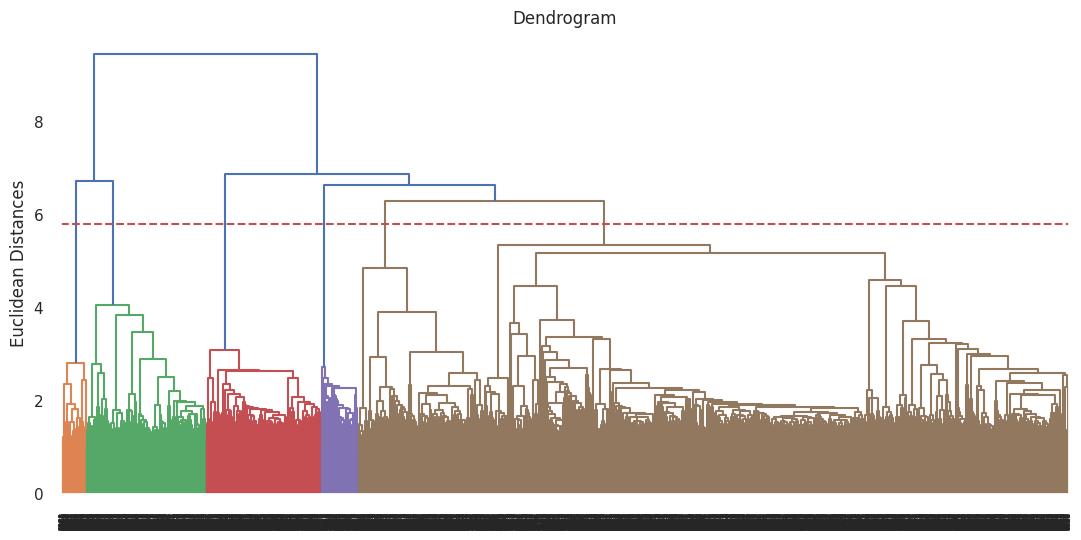

In [ ]:
# ML Model - 2 Implementation
# Using the dendrogram to find the optimal number of clusters

# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 6.

In [ ]:
# Instantiate the Agglomerative clustering model where number of clusters is 6
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

# Fit the data to the Agglomerative cluster
aggh.fit(X)

# Predict on the model
y_hc=aggh.fit_predict(X)

In [ ]:
# Adding a new column 'Agg_cluster' in the dataset
data["Agg_cluster"]=y_hc
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags,K_mean_cluster,Agg_cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,4,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devastating earthquake hits mexico city trappe...,5,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",army recruit found dead fellow soldiers forced...,5,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robots hide fear...,3,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,brilliant group students become cardcounting e...,3,0


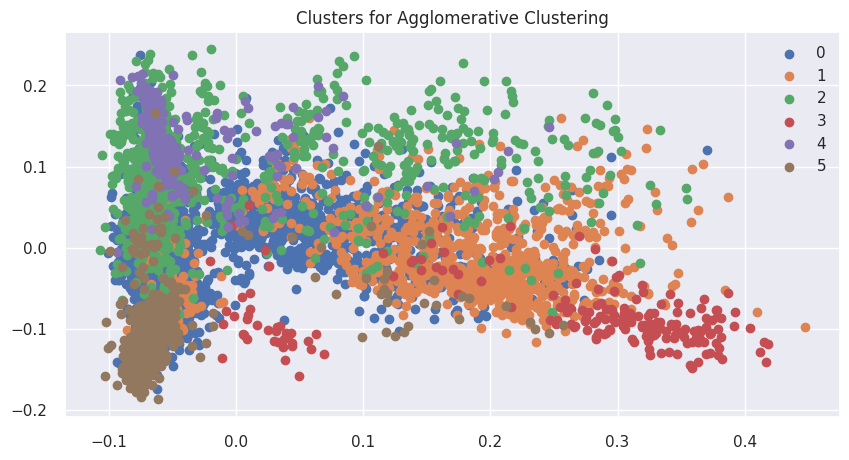

In [ ]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_hc == i , 0] ,X[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the performance of our algorithm. Here we can see the different clusters

Here i used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

(1) The process starts by calculating the dissimilarity between the N objects.

(2) Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.

(3) Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Here for optimal number of clusters i have use Dendrogram. We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

I have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 6.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

### ML Model - 3 : Silhouette Score for Clustering

In [ ]:
# ML Model - 3 Implementation
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0083
For n_clusters = 3, silhouette score is 0.0107
For n_clusters = 4, silhouette score is 0.0116
For n_clusters = 5, silhouette score is 0.0131
For n_clusters = 6, silhouette score is 0.0107
For n_clusters = 7, silhouette score is 0.0110
For n_clusters = 8, silhouette score is 0.0103
For n_clusters = 9, silhouette score is 0.0097
For n_clusters = 10, silhouette score is 0.0100
For n_clusters = 11, silhouette score is 0.0112
For n_clusters = 12, silhouette score is 0.0116
For n_clusters = 13, silhouette score is 0.0116
For n_clusters = 14, silhouette score is 0.0120


From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

For n_clusters = 2, silhouette score is 0.008321857541943244


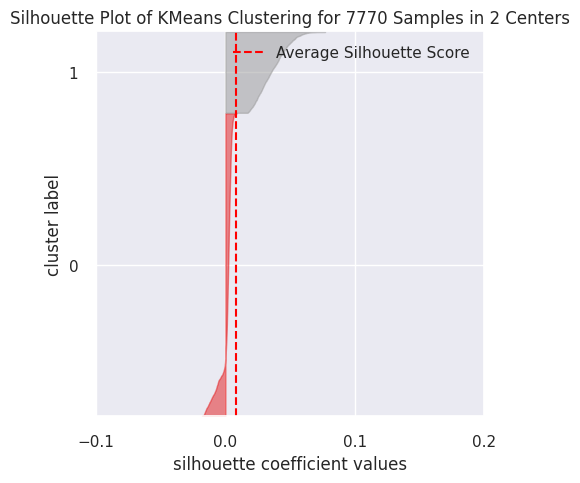

For n_clusters = 3, silhouette score is 0.010707996674218569


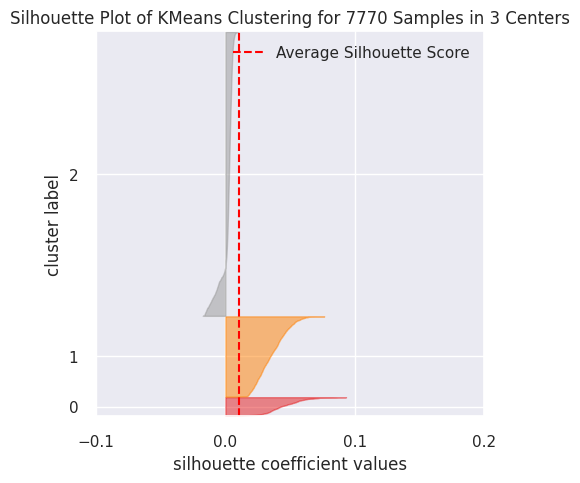

For n_clusters = 4, silhouette score is 0.011648961976936854


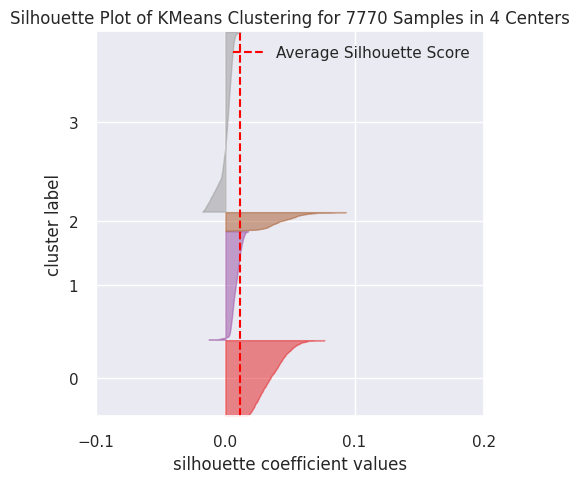

For n_clusters = 5, silhouette score is 0.013132720638254405


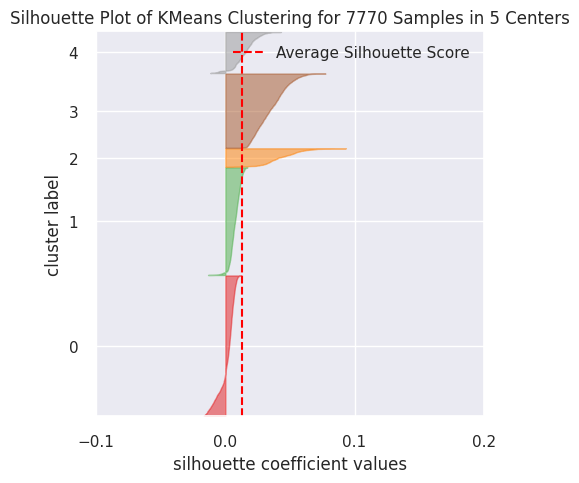

For n_clusters = 6, silhouette score is 0.010683212354935643


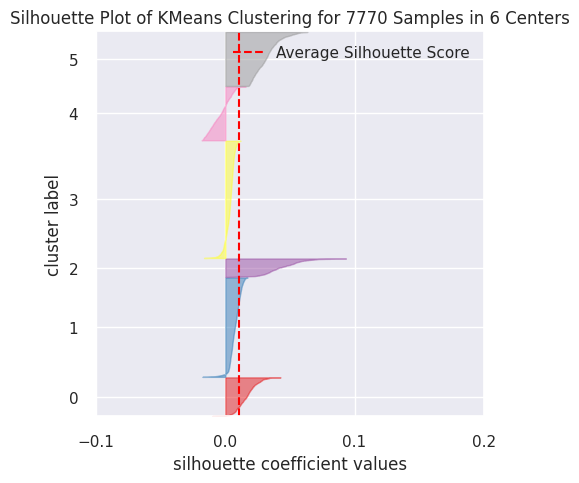

For n_clusters = 7, silhouette score is 0.010980339364367509


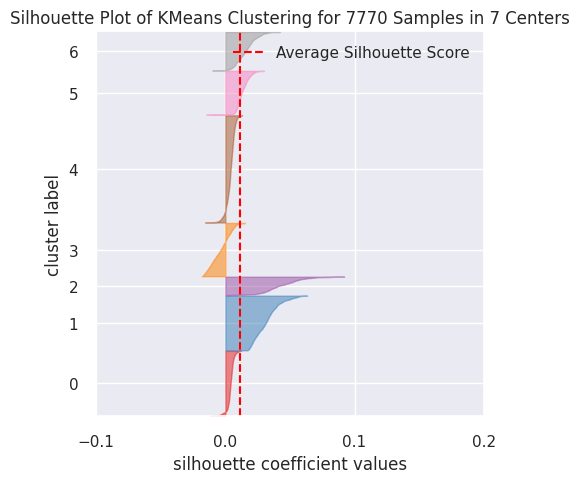

For n_clusters = 8, silhouette score is 0.010284461546665569


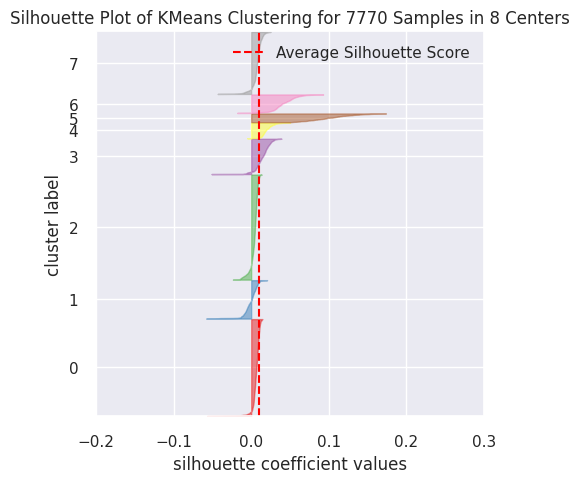

For n_clusters = 9, silhouette score is 0.009725541776210416


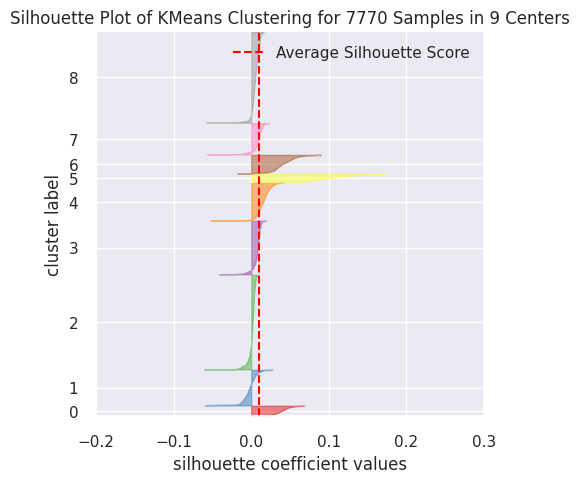

For n_clusters = 10, silhouette score is 0.009951763187831586


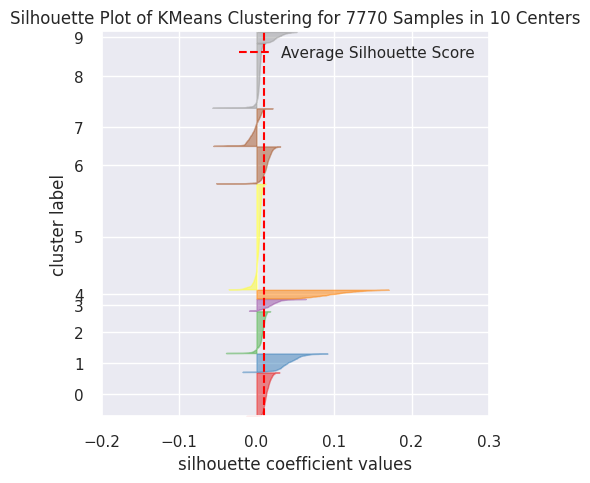

For n_clusters = 11, silhouette score is 0.011167500249943826


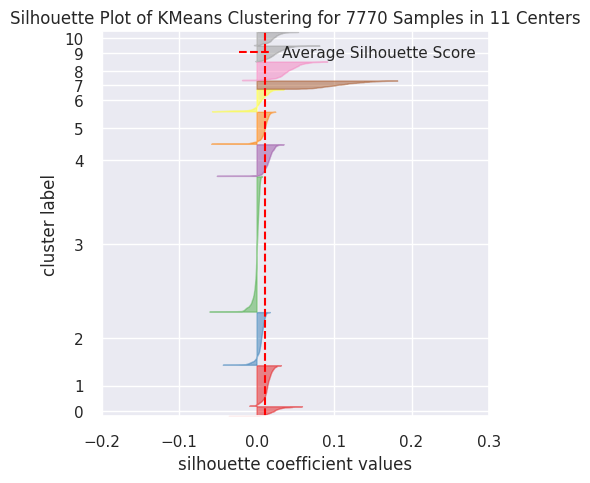

For n_clusters = 12, silhouette score is 0.011619131453192379


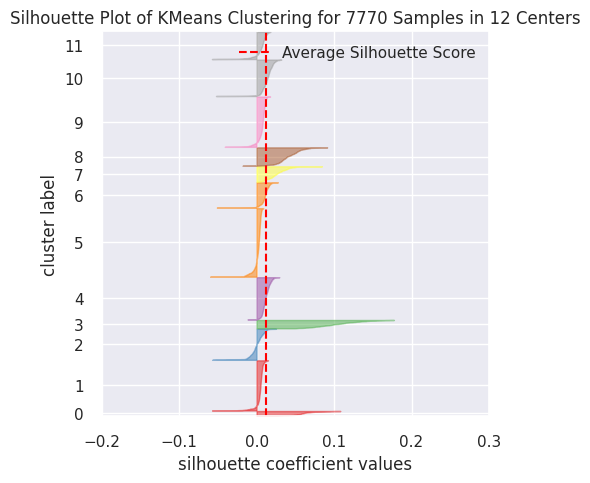

For n_clusters = 13, silhouette score is 0.011587353096933477


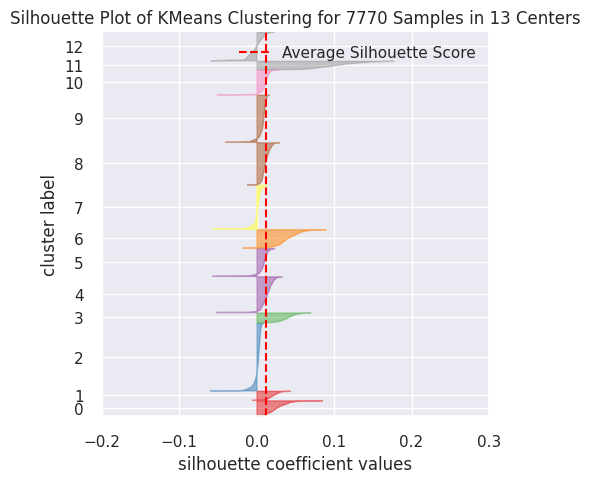

For n_clusters = 14, silhouette score is 0.011996474904088002


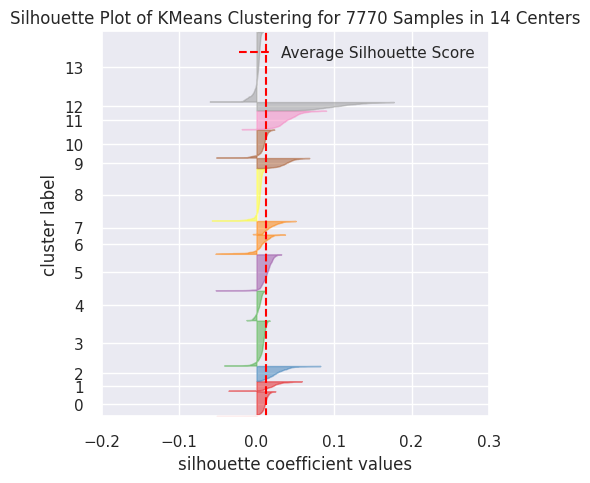

In [ ]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
for n_clusters in range(2, 15):
    # Initialize KMeans
    km = KMeans(n_clusters=n_clusters, init='k-means++', random_state=51)

    # Fit and predict
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_

    # Silhouette score
    score = silhouette_score(X, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    # Visualizer setup and plotting
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X)   # Fit the training data
    visualizer.poof()    # Draw/poof the plot


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Here we define the number of clusters basis on the Silhouette Cofficient

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

**1:** Means clusters are well apart from each other and clearly distinguished.

**0:** Means clusters are indifferent, or we can say that the distance between clusters is not significant.

**-1:** Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 5 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

To choose the final prediction model, the process typically involves evaluating multiple models on a specific task (e.g., classification or regression) and selecting the one that performs best based on evaluation metrics (accuracy, precision, recall, F1-score, AUC, etc.).

From the provided column names, it seems you have the clusters (Agg_cluster) generated from a topic modeling or clustering task. However, you might want to predict another column based on these clusters, such as predicting type (Movie or TV Show) using the clusters as features. I’ll walk you through how to compare models and select the final one.

Steps:
Prepare features and target for model training.
Train multiple models.
Evaluate models using cross-validation or a validation set.
Select the final model based on performance metrics.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Step 1: Prepare the data
X = data[['Agg_cluster']]  # Using the cluster as the feature (you can add more features if needed)
y = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)  # Encoding 'type' as 1 for Movie, 0 for TV Show

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train and evaluate multiple models

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Model 2: Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

# Step 3: Compare the models based on accuracy
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"SVC Accuracy: {svc_accuracy:.4f}")

# Step 4: Select the final model based on accuracy
if rf_accuracy > svc_accuracy:
    final_model = rf_model
    print("Selected Model: Random Forest")
else:
    final_model = svc_model
    print("Selected Model: SVC")

# Step 5: Evaluate the final model
final_pred = final_model.predict(X_test)
print("\nClassification Report for Final Model:")
print(classification_report(y_test, final_pred))


Random Forest Accuracy: 0.8160
SVC Accuracy: 0.8160
Selected Model: SVC

Classification Report for Final Model:
              precision    recall  f1-score   support

           0       0.88      0.41      0.56       441
           1       0.81      0.98      0.88      1113

    accuracy                           0.82      1554
   macro avg       0.84      0.69      0.72      1554
weighted avg       0.83      0.82      0.79      1554



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

preprocess_duration Function:

If the duration contains 'min', it extracts the numeric value (e.g., 47 from '47 min').
If it contains 'Season', it converts seasons to minutes (you can adjust the conversion factor based on your understanding, for simplicity we assume 1 season = 60 minutes).
duration_processed Column:

This new column contains the numeric version of duration, which can be used directly in the machine learning model.
Model Training:

We use the processed duration feature in the model instead of the original duration column.

In [ ]:
# Step 1: Define a function to handle duration
def preprocess_duration(row):
    if 'min' in row:
        return int(row.split()[0])  # Extract the numeric value for movies in minutes
    elif 'Season' in row:
        return int(row.split()[0]) * 60  # Convert seasons to approximate minutes (assuming 1 season ~ 60 mins for simplicity)
    else:
        return np.nan  # Handle any unexpected cases

# Step 2: Apply the function to the 'duration' column
data['duration_processed'] = data['duration'].apply(preprocess_duration)

# Check if it works
print(data[['duration', 'duration_processed']].head())

# Now 'duration_processed' is a numeric column and can be used for modeling

# Step 3: Use the new 'duration_processed' in place of the original 'duration'
X = data[['release_year', 'Agg_cluster', 'duration_processed']]  # Use the processed duration feature
y = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)  # Encode 'type' as 1 for Movie, 0 for TV Show

# Continue with model training as before...
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# You can also plot the feature importance as before


    duration  duration_processed
0  4 Seasons                 240
1     93 min                  93
2     78 min                  78
3     80 min                  80
4    123 min                 123
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       441
           1       1.00      0.99      0.99      1113

    accuracy                           0.99      1554
   macro avg       0.98      0.99      0.99      1554
weighted avg       0.99      0.99      0.99      1554



## ***8. Content Based Recommender System***

In [ ]:
# Defining a new dataframe for building a recommender system
recommender_df = data.copy()

# Resetting index
recommender_df.reset_index(inplace=True)

# Dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [ ]:
# Calculate cosine similarity on transformed array independent features created from tags(cluster) column
similarity = cosine_similarity(X)

In [ ]:
# Define a function which recommends top 10 shows on the basis of cosine similarity score
def recommend(content):
  try:
    '''
    This function recommends top 10 shows similar to the input show based on their similarity scores.
    '''

    # Find the index position of the input content
    index = recommender_df[recommender_df['title'] == content].index[0]

    # Sorting on the basis of similarity score, in order to find out distances from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # Display the input movie/tv show name
    print('--'*30)
    print(f"Since you liked '{content}', you may also like:")
    print('--'*30)

    # List the top ten recommended movies/tv shows
    for i in distances[1:11]:
      print(data.iloc[i[0]].title)
  except:
     print(f"Didn't find any matches for '{content}'. Browse other popular TV shows and movies.")

In [ ]:
# Testing Recommender System on a Indian Movie
recommend('Zindagi Na Milegi Dobara')

------------------------------------------------------------
Since you liked 'Zindagi Na Milegi Dobara', you may also like:
------------------------------------------------------------
23:59
706
1920
1994
22-Jul
15-Aug
'89
​Goli Soda 2
​Maj Rati ​​Keteki
​Mayurakshi


In [ ]:
# Testing Recommender System on a International Movie
recommend('Avengers: Infinity War')

------------------------------------------------------------
Since you liked 'Avengers: Infinity War', you may also like:
------------------------------------------------------------
7:19
23:59
9
21
46
122
187
706
1920
1922


In [ ]:
# Testing Recommender System on a Korean TV Show
recommend('What in the World Happened?')

------------------------------------------------------------
Since you liked 'What in the World Happened?', you may also like:
------------------------------------------------------------
23:59
706
1920
1994
22-Jul
15-Aug
'89
​Goli Soda 2
​Maj Rati ​​Keteki
​Mayurakshi


In [ ]:
# Testing Recommender System on a Content, Which is Not Listed in Netflix Dataset
recommend('Avenger')

Didn't find any matches for 'Avenger'. Browse other popular TV shows and movies.


## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('kmeans_model.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Unserialize process (rb=read byte)
y_kmean

array([4, 5, 5, ..., 1, 4, 1], dtype=int32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of the project was to cluster TV shows and movies based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 10 shows to users based on their viewing history. Some key points from the project include:

* Exploring the dataset consist of 7787 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA).

* The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

* To cluster the shows, i have selected six key attributes: director, cast, country, genre, rating, and description (all are categorical variables). These attributes were transformed into a 9000-feature TF-IDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. Captured more than 80% of the variance by reducing the components to 2500.

* Next, i used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method confirmed that the optimal number of clusters was 6 for K-Means, however for Silhouette score analysis it was 5.

* In Agglomerative clustering the optimal number of clusters was also 6, which we visualized with a dendrogram.

* Continued all the efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity.

The recommender system offers personalized recommendations based on the type of shows the user has watched and provides the user with ten top-notch suggestions to explore.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***